In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [44]:
def manual_mean_filtering(image, kernel_size=3):
    h, w = image.shape[:2]
    filtered_image = np.zeros((h, w), np.uint8)
    k = kernel_size // 2
    
    for i in range(k, h - k):
        for j in range(k, w - k):
            region = image[i - k:i + k + 1, j - k:j + k + 1]
            mean_value = np.mean(region)
            filtered_image[i, j] = mean_value
    
    return filtered_image

In [45]:
image_path = 'profil.jpg'
image = cv2.imread(image_path)

In [46]:
if image is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan di path: {image_path}")

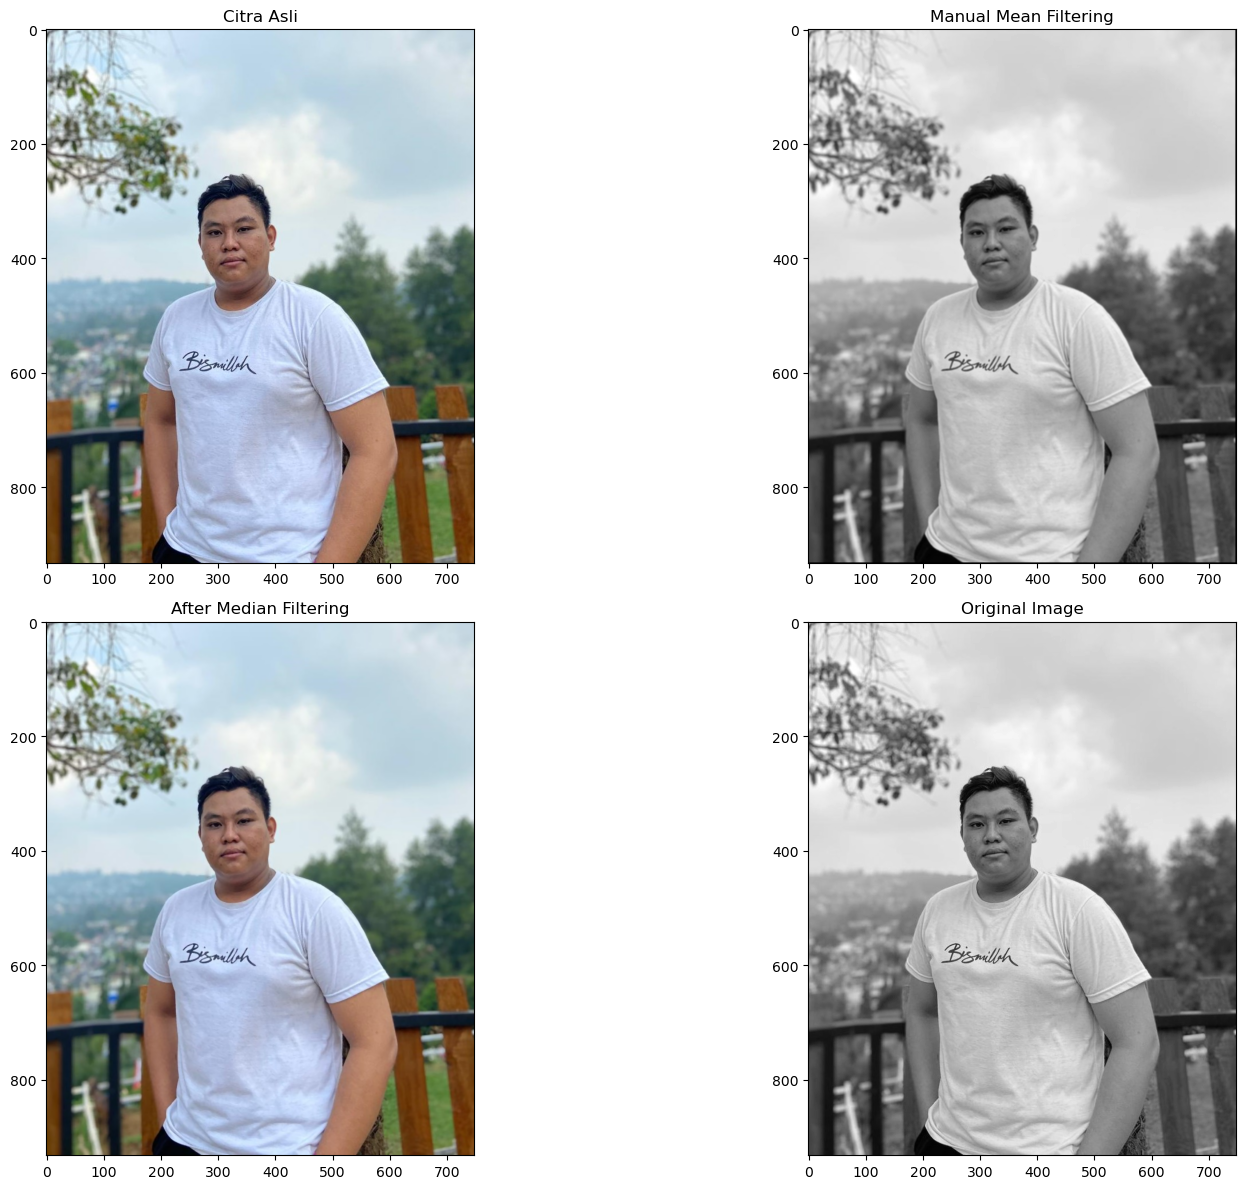

In [50]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mean_filtered_image = manual_mean_filtering(gray_image, kernel_size=3)
median_filtered_image = cv2.medianBlur(image, 3)

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Manual Mean Filtering')
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('After Median Filtering')
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('on')

plt.tight_layout()
plt.show()